# Lecture on Image Filtering

In [7]:
import matplotlib
import numpy as np
import scipy as sp
from scipy import signal
from scipy import misc
import math
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# Filtering in 1D

## Adding noise to 1D data 

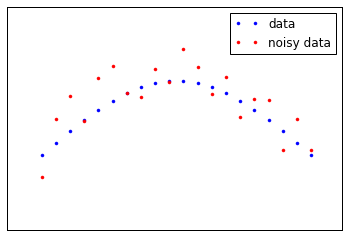

In [2]:
n = 20
x = np.linspace(0, np.pi, n)
y = np.sin(x)
mu = 0.0
sigma = 0.2
y_noisy = y + np.random.normal(mu, sigma, n)

plt.plot(x,y,'.', label='data')
plt.plot(x,y_noisy,'.r', label='noisy data')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(['data', 'noisy data'])

## 1D data smoothing using averaging

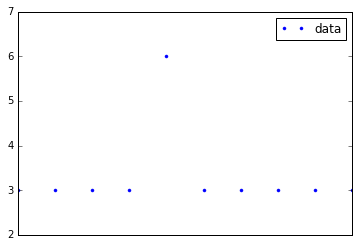

In [64]:
x = np.linspace(0,9,10)
y = np.array([3,3,3,3,6,3,3,3,3,3])

plt.plot(x,y,'.',label='data')
plt.ylim(2,7)
plt.xlim(0,9)
plt.xticks([])
plt.legend(['data'])


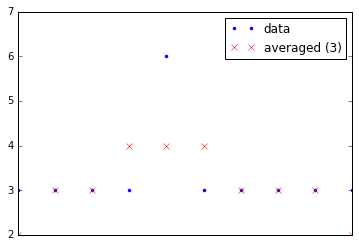

In [66]:
w = np.array([1,1,1])/3.
smooth_y = sp.signal.convolve(y, w, mode='same')

plt.plot(x,y,'.', label='averaged (3)')
plt.plot(x,smooth_y,'xr', label='data')
plt.ylim(2,7)
plt.xlim(0,9)
plt.xticks([])
plt.legend(['data', 'averaged (3)'])


### A more visual exampls

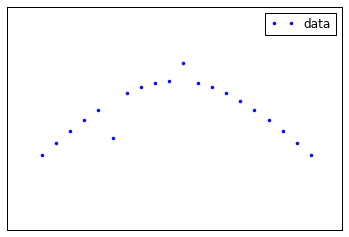

In [68]:
n = 20
x = np.linspace(0, np.pi, n)
y = np.sin(x)
y[n/4] = y[n/4] - .5
y[n/2] = y[n/2] + .25
plt.plot(x,y,'.', label='data')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(['data', 'noisy data'])

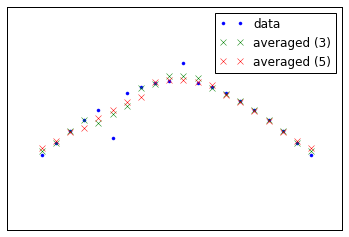

In [69]:
w = np.array([1,1,1,1,1])/5.0
smooth_y = sp.signal.convolve(y, w, mode='same')

plt.plot(x,y,'.', label='data')
plt.plot(x,sp.signal.convolve(y, np.array([1,1,1])/3.0, mode='same'),'xg', label='averaged (3)')
plt.plot(x,smooth_y,'xr', label='averaged (5)')
plt.xlim(-.4,3.5)
plt.ylim(-1,2)
plt.xticks([])
plt.yticks([])
plt.legend(['data', 'averaged (3)', 'averaged (5)'])

## Consider $sin(x)$ 1D signal

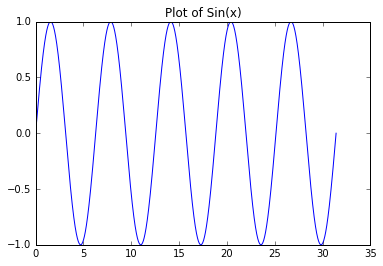

In [73]:
n = 2000
x = np.linspace(0, 10*np.pi, n) # n evenly-spaced values from 0 to 20
y = np.sin(x)
plt.plot(x,y)
plt.title('Plot of Sin(x)')
plt.show()

### Adding noise

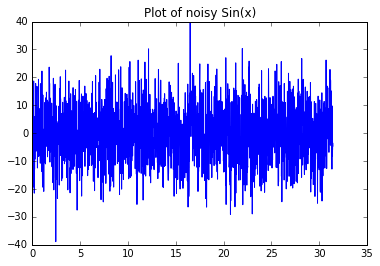

In [74]:
mu, sigma = 0.0, 10
y = np.sin(x) + np.random.normal(mu, sigma, n)
plt.plot(x,y)
plt.title('Plot of noisy Sin(x)')
plt.show()

Is it possible to recover the original noise-free signal? Can we at least strengthen the signal vis-a-vis the noise?
We will use convolution to recover original signal from the noisy signal

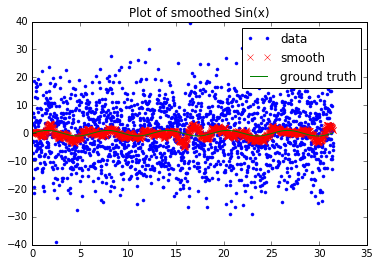

In [76]:
# Construct a kernel or a filter
window_len = 60

# Averaging kernel
w = np.ones(window_len,'d')

# Gaussian kernel
# w = sp.signal.gaussian(window_len,5,sym='true') # Gaussian 

# Normalize the weights
w /= np.sum(w)

# Convolve the kernel w with the signal w
smooth_y = sp.signal.convolve(y, w, mode='same')
plt.plot(x, y,'.',label='data')
plt.plot(x, smooth_y,'rx',label='smooth')
plt.plot(x, np.sin(x),'g',label='ground truth')
plt.title('Plot of smoothed Sin(x)')
plt.legend(['data','smooth','ground truth'])
plt.show()

### Gaussian filters

Lets create a Gaussian filter in 1D.  We will use both built-in function and our own function to generate a 1D Gaussian kernel.

Gaussian function in 1d: $G(\mu,\sigma,x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp - \frac{(x-\mu)^2}{2 \sigma^2}$

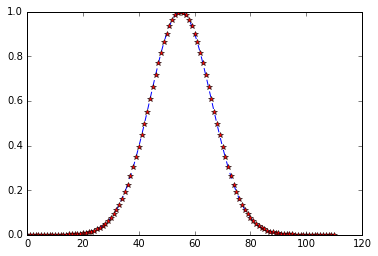

In [17]:
# Our own method for designing a Gaussian 1D filter. 
def gaussian1d(mu, sig, n):
    s = int(n/2)    
    x = np.linspace(-s,s,n)    
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

n = 111
sigma = 11.0

# Using built-in function 
g1d_builtin = sp.signal.gaussian(n,sigma)

# Using our own method
g1d_ours = gaussian1d(0.0, sigma, n)

plt.plot(g1d_builtin, '--')
plt.plot(g1d_ours, 'r*')

## Filtering in 2D

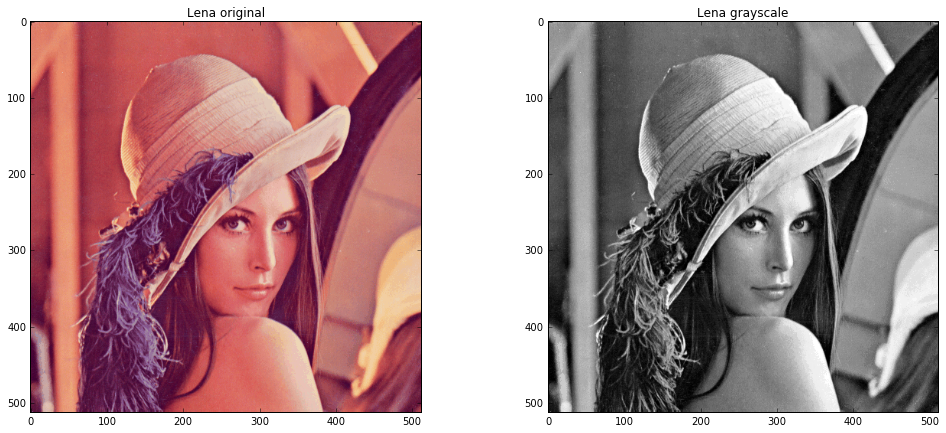

In [3]:
img_lena_bgr = cv2.imread('lena-orig.png')
img_lena = cv2.cvtColor(img_lena_bgr, cv2.COLOR_BGR2RGB)
img_lena_gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
plt.imshow(img_lena)
plt.title('Lena original')

plt.subplot(1,2,2)
plt.imshow(img_lena_gray, cmap='gray')
plt.title('Lena grayscale')

plt.show()

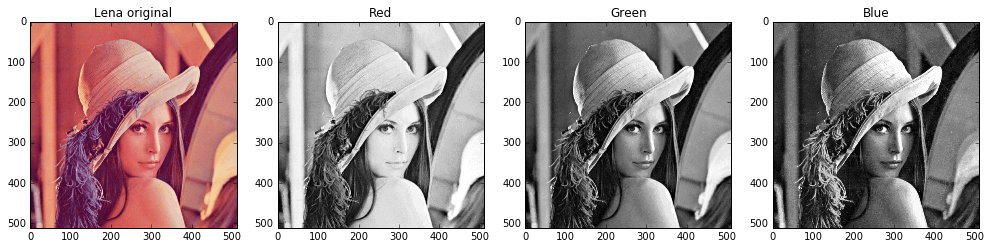

In [4]:
plt.figure(figsize=(17,7))

plt.subplot(1,4,1)
plt.imshow(img_lena)
plt.title('Lena original')

plt.subplot(1,4,2)
plt.imshow(img_lena[:,:,0], cmap='gray')
plt.title('Red')

plt.subplot(1,4,3)
plt.imshow(img_lena[:,:,1], cmap='gray')
plt.title('Green')

plt.subplot(1,4,4)
plt.imshow(img_lena[:,:,2], cmap='gray')
plt.title('Blue')

plt.show()

In [4]:
print 'Inspecting shapes\n'

print 'Lena original', img_lena.shape
print 'Lena grayscale', img_lena_gray.shape

Inspecting shapes

Lena original (512, 512, 3)
Lena grayscale (512, 512)


### Images as matrices

array([[154, 166, 166, ..., 149, 157, 157],
       [157, 175, 175, ..., 157, 149, 149],
       [166, 171, 181, ..., 157, 157, 157],
       ..., 
       [126, 128, 124, ..., 104, 113, 101],
       [128, 137, 137, ..., 102, 102, 102],
       [137, 128, 124, ..., 102, 102, 113]], dtype=uint8)

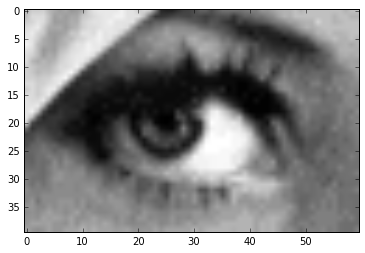

In [5]:
lena_eye_patch = img_lena_gray[245:285, 240:300]
plt.imshow(lena_eye_patch, cmap='gray')

lena_eye_patch

array([[133, 149, 149, ..., 137, 141, 141],
       [141, 141, 157, ..., 141, 137, 137],
       [149, 153, 165, ..., 141, 141, 141],
       ..., 
       [109, 117, 109, ...,  93, 105,  80],
       [117, 129, 129, ...,  93,  93,  93],
       [129, 117, 109, ...,  93,  93, 105]], dtype=uint8)

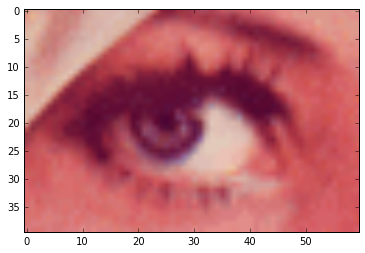

In [6]:
lena_eye_patch = img_lena[245:285, 240:300, :]
plt.imshow(lena_eye_patch)

lena_eye_patch[:,:,2]


### Images as surfaces

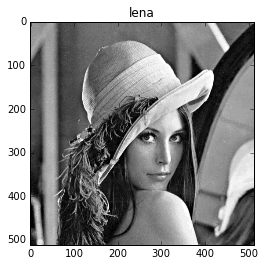

In [7]:
from mpl_toolkits.mplot3d import Axes3D

img_lena_surf = img_lena_gray #cv2.resize(img_lena_gray, (128,128))

plt.imshow(img_lena_surf, cmap='gray')
plt.title('lena')

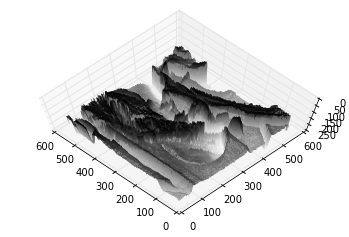

In [8]:
# # create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_lena_surf.shape[0], 0:img_lena_surf.shape[1]]

# # create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(255, -45+90)
ax.plot_surface(xx, yy, img_lena_surf ,rstride=1, cstride=1, cmap=plt.cm.gray,
         linewidth=0)

# show it
plt.show()

## Load a noisy image

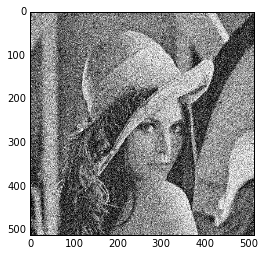

In [9]:
# Load a more noisy image
img = cv2.imread('lena-more-noisy.png')
img_more_noisy = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_more_noisy, cmap='gray')

In [10]:
N = 5

print img_more_noisy[0:N, 0:N]

[[220 140 129  79 213]
 [193 244 158 188 187]
 [166 189 139 114 123]
 [180  56 149 186  97]
 [127 119 166 159 160]]


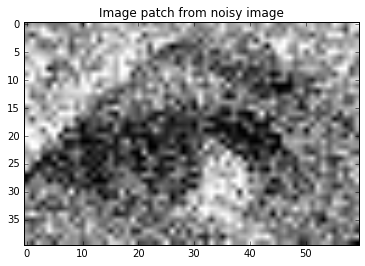

In [22]:
plt.imshow(img_more_noisy[240:280, 240:300], cmap='gray')
plt.title('Image patch from noisy image')

## Load a less noisy image

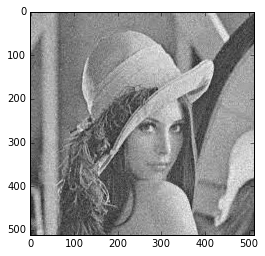

In [23]:
# Load a less noisy image
img = cv2.imread('lena-less-noisy.jpg')
img_less_noisy = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_less_noisy, cmap='gray')

In [24]:
print img_less_noisy[0:N,0:N]

[[141 148 155 155 148]
 [139 146 153 153 147]
 [138 145 151 152 146]
 [141 147 153 154 150]
 [143 149 155 156 153]]


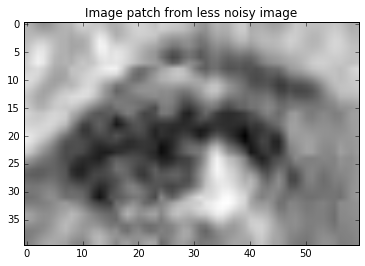

In [25]:
plt.imshow(img_less_noisy[240:280, 240:300], cmap='gray')
plt.title('Image patch from less noisy image')

# Plotting a row to see the effect of noise

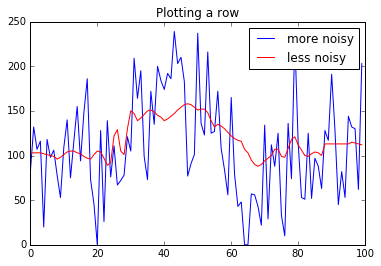

In [26]:
N = 100
R = 100
p1 = plt.plot(img_more_noisy[100,0:N], label='more noisy')
p2 = plt.plot(img_less_noisy[100,0:N],'r', label='less noisy')
plt.legend()
plt.title('Plotting a row')
plt.show()

In [14]:
cv2.imwrite('lena-more-noisy-crop.png', img_more_noisy[240:280, 240:300])
cv2.imwrite('lena-less-noisy-crop.png', img_less_noisy[240:280, 240:300])

True

# Averaging in 1D

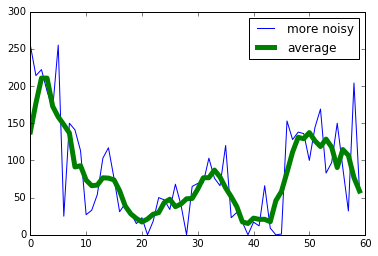

In [17]:
p1 = plt.plot(img_more_noisy[260,240:300], label='more noisy')
p1 = plt.plot(np.convolve(img_more_noisy[260,240:300], [1/5.,1/5.,1/5.,1/5.,1/5.], mode='same'), 'g', linewidth=5, label='average')
plt.legend()
plt.show()

## Averaging in 2D example

In [18]:
test_img = np.array([[1,2,1,4,5],
                     [1,3,90,4,5],
                     [30,1,1,3,1],
                     [1,2,3,1,4],
                     [1,3,2,60,1]],dtype='int32')
print test_img.shape
print test_img

#plt.imshow(test_img, cmap='gray')

(5, 5)
[[ 1  2  1  4  5]
 [ 1  3 90  4  5]
 [30  1  1  3  1]
 [ 1  2  3  1  4]
 [ 1  3  2 60  1]]


In [19]:
average_3_by_3 = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]], dtype='float32')/9.

average_5_by_5 = np.array([[1,1,1,1,1],
                           [1,1,1,1,1],
                           [1,1,1,1,1],
                           [1,1,1,1,1],
                           [1,1,1,1,1]], dtype='float32')/25.


average_7_by_7 = np.array([[1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1],
                           [1,1,1,1,1,1,1]], dtype='float32')/49.

test_img_averaged = sp.signal.convolve2d(test_img, average_3_by_3, mode='same')
print test_img_averaged

[[  0.77777778  10.88888897  11.55555564  12.1111112    2.00000001]
 [  4.22222225  14.44444455  12.1111112   12.66666676   2.44444446]
 [  4.22222225  14.66666678  12.00000009  12.44444454   2.00000001]
 [  4.22222225   4.88888893   8.44444451   8.44444451   7.77777784]
 [  0.77777778   1.33333334   7.88888895   7.88888895   7.33333339]]


## Averaging example on images

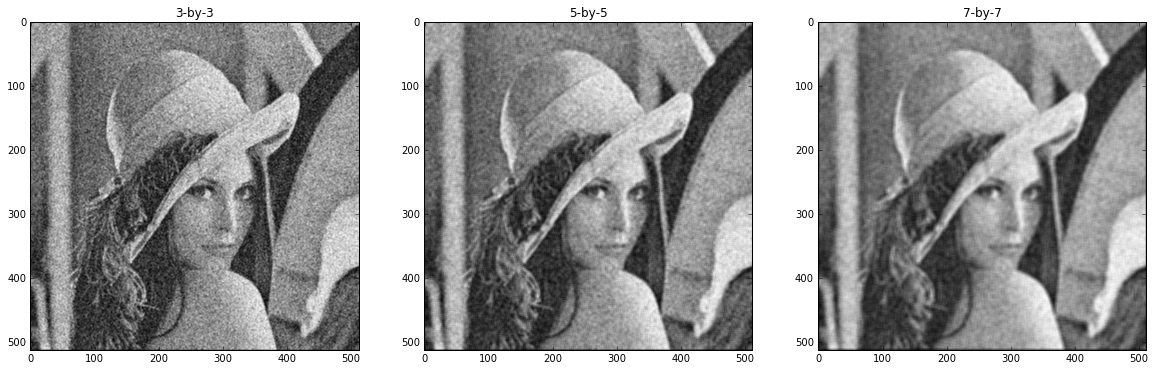

In [26]:
img_more_noisy_averaged = sp.signal.convolve2d(img_more_noisy, average_7_by_7, mode='same')

plt.figure(figsize=(20,7))

plt.subplot(1, 3, 1)
plt.imshow(sp.signal.convolve2d(img_more_noisy, average_3_by_3, mode='same'), cmap='gray')
plt.title('3-by-3')
plt.subplot(1, 3, 2)
plt.imshow(sp.signal.convolve2d(img_more_noisy, average_5_by_5, mode='same'), cmap='gray')
plt.title('5-by-5')
plt.subplot(1, 3, 3)
plt.imshow(sp.signal.convolve2d(img_more_noisy, average_7_by_7, mode='same'), cmap='gray')
plt.title('7-by-7')
plt.show()

# Some other kinds of linear filters

## A kernel that shifts the image

In [38]:
shift_right = np.array([[0,0,0,0,0],
                        [0,0,0,0,0],
                        [0,0,0,0,1],
                        [0,0,0,0,0],
                        [0,0,0,0,0]], dtype='float32')

shift_left = np.array([[0,0,0,0,0],
                       [0,0,0,0,0],
                       [1,0,0,0,0],
                       [0,0,0,0,0],
                       [0,0,0,0,0]], dtype='float32')


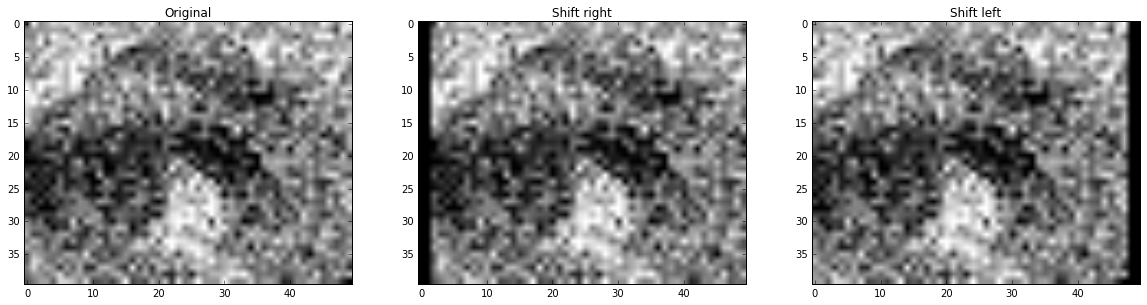

In [40]:
img_eye =  img_more_noisy[240:280, 250:300]
img_eye_shifted_right = sp.signal.convolve2d(img_eye, shift_right, mode='same')
img_eye_shifted_left = sp.signal.convolve2d(img_eye, shift_left, mode='same')

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.imshow(img_eye, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(img_eye_shifted_right, cmap='gray')
plt.title('Shift right')
plt.subplot(1,3,3)
plt.imshow(img_eye_shifted_left, cmap='gray')
plt.title('Shift left')
plt.show()


## A kernel to find edges

In [44]:
sobel_x = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]], dtype='float32')

sobel_y = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]], dtype='float32')


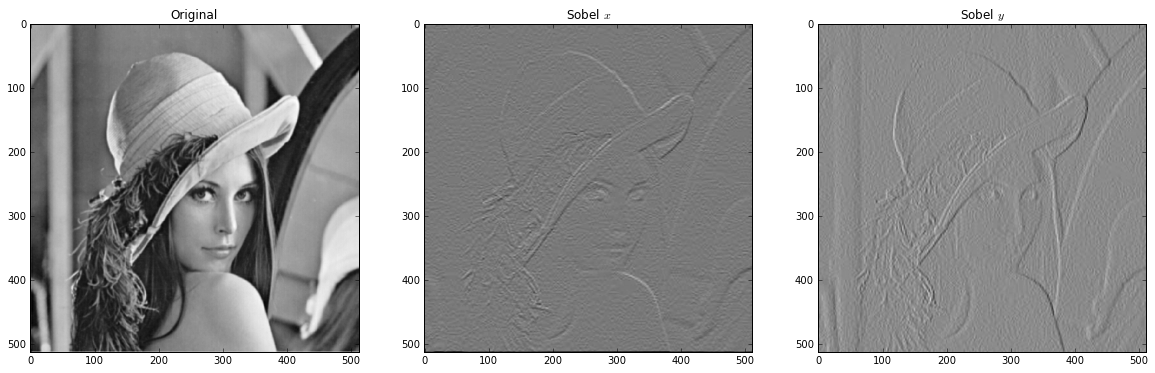

In [50]:
img = cv2.imread('lena-orig.jpg')
img_lena = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.imshow(img_lena, cmap='gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(sp.signal.convolve2d(img_less_noisy, sobel_x, mode='same'), cmap='gray')
plt.title('Sobel $x$')
plt.subplot(1,3,3)
plt.imshow(sp.signal.convolve2d(img_less_noisy, sobel_y, mode='same'), cmap='gray')
plt.title('Sobel $y$')
plt.show()


# A kernel for blurring images - Guassian blurring

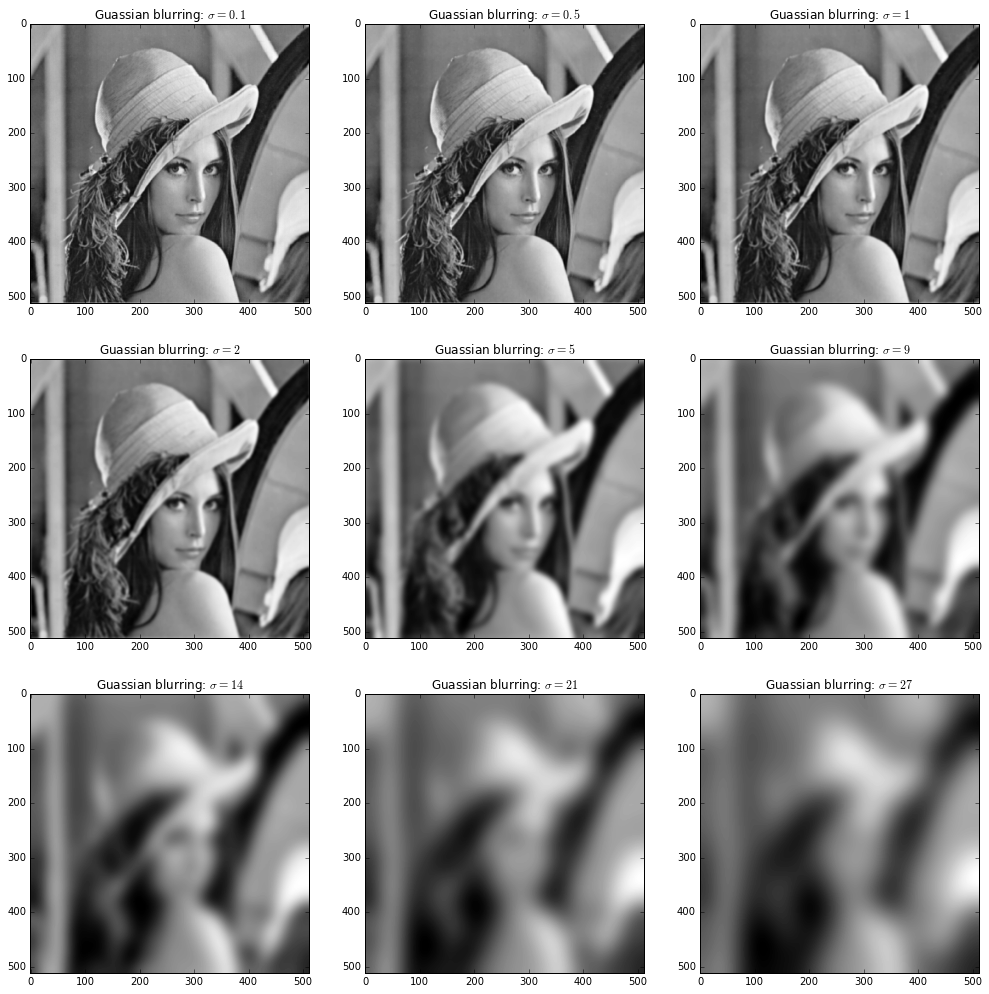

In [57]:
plt.figure(figsize=(17,17))

plt.subplot(3,3,1)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,0.1), cmap='gray')
plt.title('Guassian blurring: $\sigma = 0.1$')

plt.subplot(3,3,2)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,0.5), cmap='gray')
plt.title('Guassian blurring: $\sigma = 0.5$')

plt.subplot(3,3,3)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,1), cmap='gray')
plt.title('Guassian blurring: $\sigma = 1$')

plt.subplot(3,3,4)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,2), cmap='gray')
plt.title('Guassian blurring: $\sigma = 2$')

plt.subplot(3,3,5)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,5), cmap='gray')
plt.title('Guassian blurring: $\sigma = 5$')

plt.subplot(3,3,6)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,9), cmap='gray')
plt.title('Guassian blurring: $\sigma = 9$')

plt.subplot(3,3,7)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,14), cmap='gray')
plt.title('Guassian blurring: $\sigma = 14$')

plt.subplot(3,3,8)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,21), cmap='gray')
plt.title('Guassian blurring: $\sigma = 21$')

plt.subplot(3,3,9)
plt.imshow(sp.ndimage.filters.gaussian_filter(img_lena,27), cmap='gray')
plt.title('Guassian blurring: $\sigma = 27$')

plt.show()


#### Gaussian function in multiple dimensions

Gaussian function in k-dimensions: $G(\mathbf{\mu},\Sigma,\mathbf{x}) = \Sigma^{-\frac{1}{2}} (2 \pi)^{-\frac{k}{2}} \exp -\frac{1}{2} (\mathbf{x} - \mathbf{\mu})' \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) $

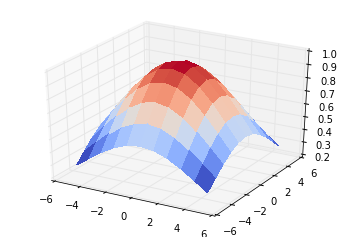

In [21]:
# Evaluates 2D Gaussian on xy grid.
# xy is two channel 2D matrix.  The first channel stores x coordinates
# [-1 0 1]
# [-1 0 1]
# [-1 0 1]
# and the second channel stores y coordinates
# [-1 -1 -1]
# [0   0  0]
# [1   1  1]
# So then we can pick out an xy value using xy[i,j,:].
# Check out gaussian2_n() to see how you can construct such
# an xy using numpy
#
# For gaussian2_xy() and gaussian2_n() methods
# mean is a 2x1 vector and cov is a 2x2 matrix

def gaussian2_xy(mean, cov, xy):
    invcov = np.linalg.inv(cov)
    results = np.ones([xy.shape[0], xy.shape[1]])
    for x in range(0, xy.shape[0]):
        for y in range(0, xy.shape[1]):
            v = xy[x,y,:].reshape(2,1) - mean
            results[x,y] = np.dot(np.dot(np.transpose(v), invcov), v)
    results = np.exp( - results / 2 )
    return results 

def gaussian2_n(mean, cov, n):
    s = int(n/2)
    x = np.linspace(-s,s,n)
    y = np.linspace(-s,s,n)
    xc, yc = np.meshgrid(x, y)
    xy = np.zeros([n, n, 2])
    xy[:,:,0] = xc
    xy[:,:,1] = yc

    return gaussian2_xy(mean, cov, xy), xc, yc

n = 111
mean =  np.array([0, 0])
mean = mean.reshape(2,1)
cov = np.array([[20,0],[0,20]])
g2d_kernel, xc, yc = gaussian2_n(mean, cov, 11)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xc, yc, g2d_kernel,rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=False)

Using Gaussian kernel or filter for image smoothing

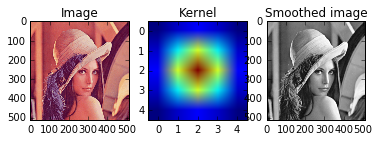

In [31]:
# Don't forget to normalize the kernel weights.
g2d_kernel_normalized = g2d_kernel / np.sum(g2d_kernel)

img_gaussian_smooth = signal.convolve2d(img_lena_gray, g2d_kernel_normalized, mode='same', boundary='fill')

plt.subplot(131)
plt.title('Image')
plt.imshow(img_lena,cmap='gray')
plt.subplot(132)
plt.title('Kernel')
plt.imshow(g2d_kernel_normalized)
plt.subplot(133)
plt.title('Smoothed image')
plt.imshow(img_gaussian_smooth,cmap='gray')

More on convolutions

In [24]:
f = np.linspace(1,5,5)
g = np.ones(3)
print 'signal(f) =', f
print 'kernel(g) =', g

fg_full = sp.signal.convolve(f,g,mode='full')
print 'fg (full) = ', fg_full
fg_same = sp.signal.convolve(f,g,mode='same')
print 'fg (same) = ', fg_same
fg_valid = sp.signal.convolve(f,g,mode='valid')
print 'fg (valid) = ', fg_valid

signal(f) = [ 1.  2.  3.  4.  5.]
kernel(g) = [ 1.  1.  1.]
fg (full) =  [  1.   3.   6.   9.  12.   9.   5.]
fg (same) =  [  3.   6.   9.  12.   9.]
fg (valid) =  [  6.   9.  12.]


## Separability

In [25]:
signal = np.array([[2,3,3],[3,5,5],[4,4,6]])
print 'signal:\n', signal

kernel_2d = np.array([[1,2,1],[2,4,2],[1,2,1]])
print '\nkernel_2d:\n', kernel_2d

kernel_1d = np.array([1,2,1]).reshape(3,1)
print '\nkernel_1d:\n', kernel_1d
print '\nkernel_1d * np.transpose(kernel_1d):\n', kernel_1d * np.transpose(kernel_1d)

print '\nconvolution(signal, kernel2d):\n', sp.signal.convolve(signal, kernel_2d, mode='valid')

a = sp.signal.convolve(signal, kernel_1d, mode='valid')
print '\na = convolution(signal, kernel1d):\n', a
print '\nconvolution(a, transpose(kernel1d):\n', sp.signal.convolve(a, np.transpose(kernel_1d), mode='valid')

signal:
[[2 3 3]
 [3 5 5]
 [4 4 6]]

kernel_2d:
[[1 2 1]
 [2 4 2]
 [1 2 1]]

kernel_1d:
[[1]
 [2]
 [1]]

kernel_1d * np.transpose(kernel_1d):
[[1 2 1]
 [2 4 2]
 [1 2 1]]

convolution(signal, kernel2d):
[[65]]

a = convolution(signal, kernel1d):
[[12 17 19]]

convolution(a, transpose(kernel1d):
[[65]]


## Gaussians are linearly separable

In [27]:
n = 5
mean =  np.array([0, 0])
mean = mean.reshape(2,1)
cov = np.array([[1,0],[0,1]])
g2d_kernel, xc, yc = gaussian2_n(mean, cov, n)
print '\ng2d_kernel:\n', g2d_kernel

g1d_kernel = sp.signal.gaussian(5, 1).reshape(n,1)
print '\ng1d_kernel:\n', g1d_kernel

print '\ng1d_kernel * transpose(g1d_kernel):\n', g1d_kernel * np.transpose(g1d_kernel)


g2d_kernel:
[[ 0.01831564  0.082085    0.13533528  0.082085    0.01831564]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [ 0.13533528  0.60653066  1.          0.60653066  0.13533528]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [ 0.01831564  0.082085    0.13533528  0.082085    0.01831564]]

g1d_kernel:
[[ 0.13533528]
 [ 0.60653066]
 [ 1.        ]
 [ 0.60653066]
 [ 0.13533528]]

g1d_kernel * transpose(g1d_kernel):
[[ 0.01831564  0.082085    0.13533528  0.082085    0.01831564]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [ 0.13533528  0.60653066  1.          0.60653066  0.13533528]
 [ 0.082085    0.36787944  0.60653066  0.36787944  0.082085  ]
 [ 0.01831564  0.082085    0.13533528  0.082085    0.01831564]]


# Integral image

In [87]:
x = np.array([[1,2,3,-1,3],[2,34,5,3,2],[3,2,3,42,5],[-3,1,4,98,3],[1,2,3,2,5]])
print x

from skimage import transform
s = transform.integral_image(x)

print s

[[ 1  2  3 -1  3]
 [ 2 34  5  3  2]
 [ 3  2  3 42  5]
 [-3  1  4 98  3]
 [ 1  2  3  2  5]]
[[  1   3   6   5   8]
 [  3  39  47  49  54]
 [  6  44  55  99 109]
 [  3  42  57 199 212]
 [  4  45  63 207 225]]


(512, 512)


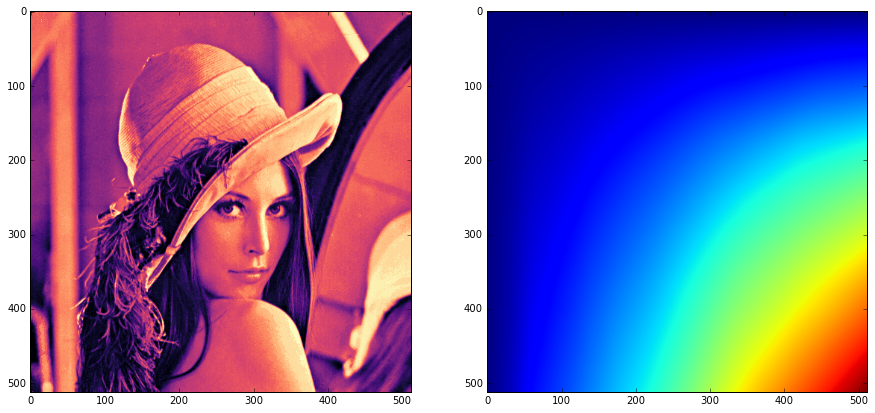

In [17]:
img = cv2.imread('lena-orig.png', 0)
print img.shape



from skimage import transform
img_integral = transform.integral_image(img)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap='magma')
plt.subplot(122)
plt.imshow(img_integral)

# Median Filtering